Projete um rachador de troncos de madeira que seja seguro e que possua as seguintes características:
- Que possa ser guinchado a velocidades de rodovia atrás de uma caminhonete grande
- Um motor a gasolina de 8 HP
- Que acomode troncos de madeira de 2ft de comprimento
- Que gere 15 toneladas de força de corte
- Que tenha uma gaiola de segurança que cubra a área do tronco durante a divisão para prevenir ferimentos no operador.

<hr>

In [1287]:
import sympy as sy
import numpy as np
import pandas as pd
from IPython.display import display, Math, Image
from math import radians, degrees, ceil

Neste projeto, a principal referência para os cálculos e configuração da caixa de redução é o Shigley's Mechanical Engineering Design

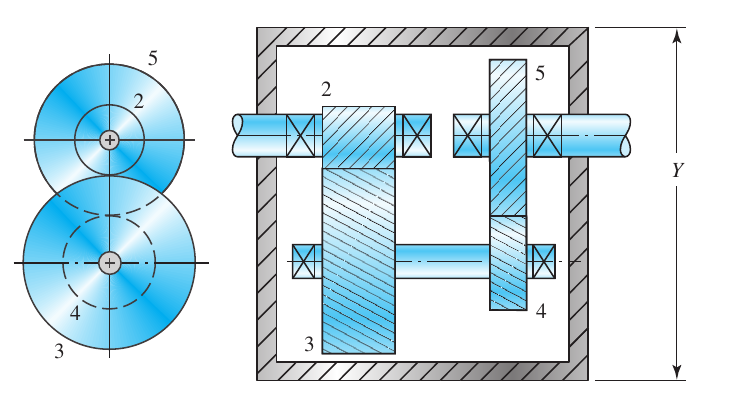

In [1288]:
Image('exemplo_shigley.png')

Todas as notações utilizadas nos cálculos seguem a mesma numeração da figura acima.

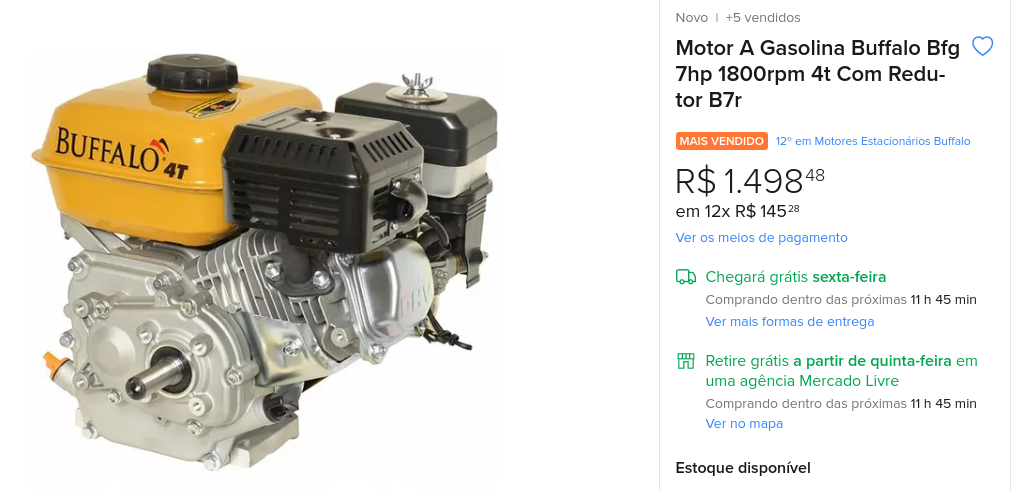

In [1289]:
Image('motor.png')
# https://produto.mercadolivre.com.br/MLB-2868528523-motor-a-gasolina-buffalo-bfg-7hp-1800rpm-4t-com-redutor-b7r-_JM

In [1290]:
# Dados
H = 7           #hp - Potência nominal (motor mais próximo encontrado)
ω2 = 1800       #RPM -  Rotação do eixo motor
ω5 = 30         #RPM -  Rotação do eixo movido
display(f'Rotação de entrada (ω2): {sy.latex(ω2)} RPM')
display(f'Rotação de saída (ω5): {sy.latex(ω5)} RPM')
data_dict = {}

'Rotação de entrada (ω2): 1800 RPM'

'Rotação de saída (ω5): 30 RPM'

In [1291]:
# Redução final para um trem de engrenagens 
# Ambos os estágios têm a mesma redução
e = ω5 / ω2
mG = sy.sqrt(ω2/ω5)
display(Math('e = \\frac{1}{%s} = \\frac{N_2}{N_3} \\frac{N_4}{N_5}'%sy.latex(ω2/ω5)))
display(Math('\\frac{N_2}{N_3} = \\frac{N_4}{N_5} = \\sqrt{\\frac{1}{%s}} = \\frac{1}{%s}'%(sy.latex(ω2/ω5), mG)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1292]:
# Número de dentes
N2 = N4 = 16
N3 = ceil(mG*(N2)) # ceil() arredonda pro int acima
N5 = N3
display(Math(f'N_2 = N_4 = {sy.latex(N2)} teeth'))
display(Math(f'N_3 = N_5 = {sy.latex(N3)} teeth'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1293]:
# Razão também é levemente arredondada
mG = N3/N2

In [1294]:
# Recalculando rotação de saída
ω5 = ((N2/N3)**2 * ω2).evalf(4)
display(Math(f'\\omega_5 = {sy.latex(ω5)} RPM'))

<IPython.core.display.Math object>

In [1295]:
ω3 = ω4 = (N2/N3)*1800
display(Math('\\omega_3 = \\omega_4 = %s RPM'%sy.latex(ω3.evalf(3))))

<IPython.core.display.Math object>

In [1296]:
# Lista para tabela no final
list_gear_index = ['Gear 2', 'Gear 3', 'Gear 4', 'Gear 5']
data_dict["N° of Teeth"] = [N2, N3, N4, N5]
data_dict["ω (RPM)"] = [ω2, ω3, ω4, ω5]

Determinando torques usando a relação de potência:

$$H = T_2 \omega_2 = T_5 \omega_5$$

In [1297]:
T2 = (H/ω2)*((550))*(1/(2*np.pi))*(60)
display(Math(f'T_2 = {T2:.2f} lbf.ft'))

<IPython.core.display.Math object>

In [1298]:
T3 = T2 * (ω2/ω3)
display(Math(f'T_3 = {T3:.2f} lbf.ft'))

<IPython.core.display.Math object>

In [1299]:
T4 = T2 * (ω2/ω4)
display(Math(f'T_4 = {T4:.2f} lbf.ft'))

<IPython.core.display.Math object>

In [1300]:
T5 = T2 * (ω2/ω5)
display(Math(f'T_5 = {T5:.2f} lbf.ft'))

<IPython.core.display.Math object>

In [1301]:
data_dict["Torque (lbf.ft)"] = [T2, T3, T4, T5]

Foi necessário definir um valor máximo pra altura da caixa. Como neste projeto, em relação às dimensões, o único requisito é que seja transportado numa caminhonete, para uma caixa de reduções existem infinitas possibilidades. Arbitrariamente, escolheu-se 41in para a altura Y, de acordo com a figura abaixo.

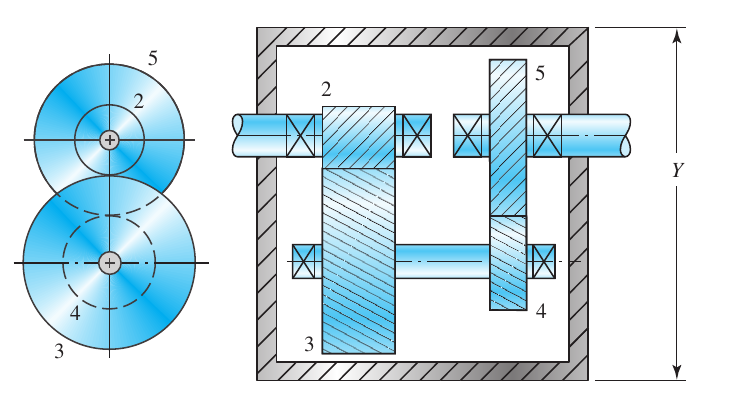

In [1302]:
Image('exemplo_shigley.png')

Nota-se que $$Y = d_3 + \frac{d_2}{2} + \frac{d_5}{2} + \frac{2}{P} + folga + espessura$$

$$Y = \frac{N_3}{P} + \frac{N_2}{2P} + \frac{N_5}{2P} + \frac{2}{P} + folga + espessura$$

Como escolheu-se Y = 41in, folga = 0.5in e espessura = 1in, pode-se resolver essa equação para P afim de encontrar o passo diametral mínimo para esta altura de caixa.

Obs.: espessura da parede da caixa

In [1303]:
# Dimensões pensadas para a caixa (in)
Y = 41           # Altura
folga = 0.5      # Folga no interior da caixa para não dar interferência
espessura = 1    # Espessura da caixa

In [1304]:
# Estimou-se o passo diametral mínimo com base na altura Y
P_min = (N3 + N2/2 + N5/2 + 2) / (Y - folga - espessura)
display(f'P_min = {P_min} teeth/in')   

'P_min = 4.96202531645570 teeth/in'

In [1305]:
# Arredondou-se para o próximo passo diametral padrão acima do mínimo obtido.
P = 5              # TODO: Caso altere valores no projeto, conferir P
d2 = d4 = N2 / P
display(Math(f'd_2 = d_4 = {sy.latex(d2)} in'))
d3 = d5 = N3 / P
display(Math(f'd_3 = d_5 = {sy.latex(d3.evalf())} in'))
dp = d2
data_dict["d (in)"] = [d2, d3, d4, d5]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1306]:
# Velocidade na linha primitiva
V23 = (np.pi*d2*ω2/12)
display(Math('V_{23} = %s ft/min'%sy.latex(V23)))
V45 = (np.pi*d5*ω5/12)
display(Math('V_{45} = %s ft/min'%sy.latex(V45)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1307]:
# Carga transmitida 
W23 = (33000*(H/V23))
display(Math("W^t_{23} = %s lbf"%W23))
W45 = (33000*(H/V45))
display(Math("W^t_{45} = %s lbf"%W45))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Desgaste da Engrenagem 4
### Está é a engrenagem mais crítica do projeto, que transmite a maior carga

In [1308]:
mN = 1    # para este tipo de engrenagem
Φ = radians(20)
I = ((np.cos(Φ)*np.sin(Φ))/(2*mN))*(mG / (mG+1))
display(Math(f'I = {I:.5f}'))

<IPython.core.display.Math object>

A AGMA define um conjunto de números de qualidade, $Q_v$. Números de qualidade de 3 a 7 incluem maior parte das engrenagens comerciais. De 8 a 12 inclui engranens de extrema precisão. Neste projeto, escolheu-se $Q_v = 7$. 

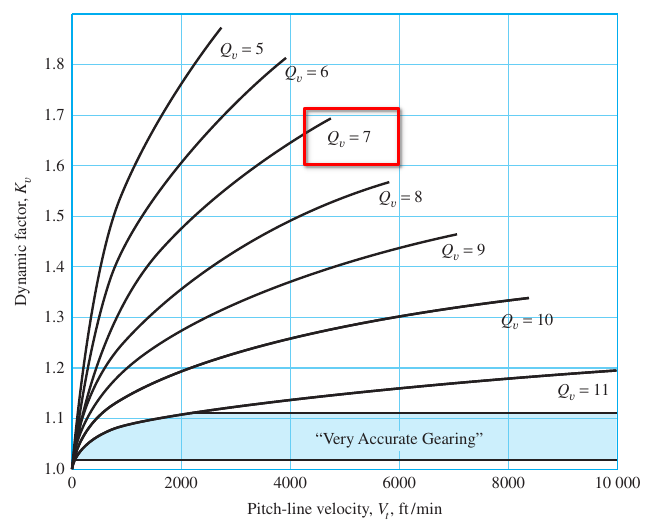

In [1309]:
Image('qv.png')

In [1310]:
# Kv - Fator Dinamico

Qv = 7

B = 0.25*(12 - Qv)**(2/3)
A = 50+56*(1-B)

Kv = ((A + sy.sqrt(V45)) / A)**B
display(Math(f'K_v = {Kv}'))

<IPython.core.display.Math object>

In [1311]:
# Largura de face
F = 3*(np.pi/P)
display(Math(f'F = {sy.latex(F)} in'))

# Arredondou-se F = 2in
F = 2        #TODO: Conferir caso haja alteração
display(Math(f'F = {sy.latex(F)} in'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

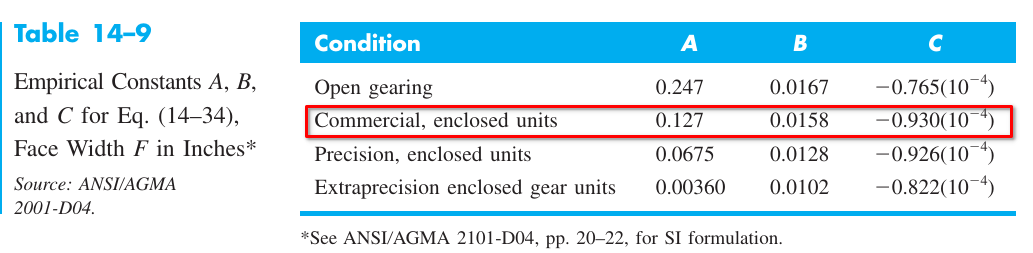

In [1312]:
Image('table14-9.png') # Utilizado em Cma

In [1313]:
# Fator de distribuição de carga Km

Cpf = ((F)/(10*(d4))) - 0.0375 + 0.0125*(F)
display(Math('C_{pf} = %s'%Cpf))

Cmc = 1
Cpm = 1
Cma = 0.127 + 0.0158*(F) + (-0.930*10**-4)*(F)**2
display(Math('C_{ma} = %s'%Cma))
Ce = 1

Km = 1 + Cmc*(Cpf*Cpm + Cma*Ce)
display(Math('K_m = %s'%Km))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

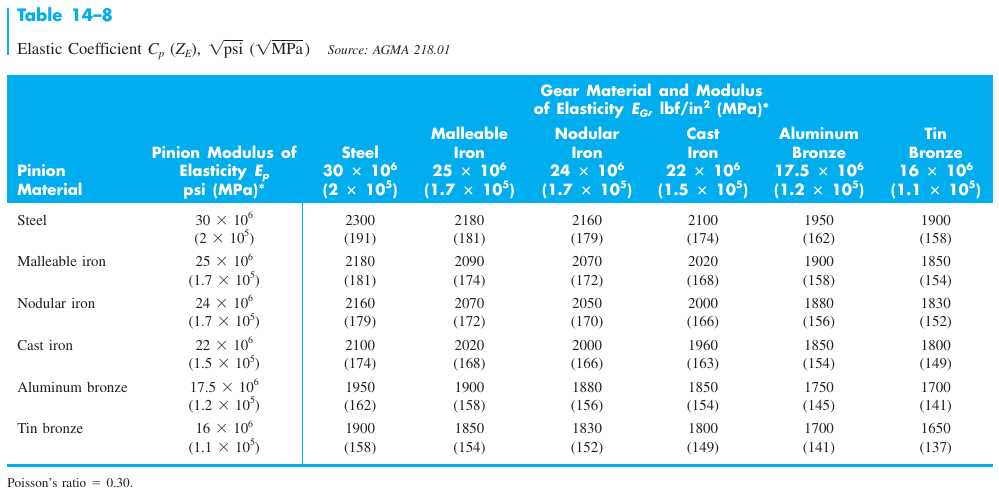

In [1314]:
Image('table14-8.png')

In [1315]:
Cp = 2300

In [1316]:
# Considerou-se 1 (AGMA)
Ko = Ks = Cf = 1

In [1317]:
# Tensão de contato
σc = Cp*sy.sqrt(W45*Ko*Kv*Ks*(Km/(dp*F))*(Cf/I))
display(Math(f'\sigma_c = {int(σc)} psi'))

<IPython.core.display.Math object>

In [1318]:
# Número de ciclos para vida de 12000 h
L4 = 12000*60*ω4
display(Math(f'L_4 = {(L4*10**-8):.3f} *10⁸ rev'))

<IPython.core.display.Math object>

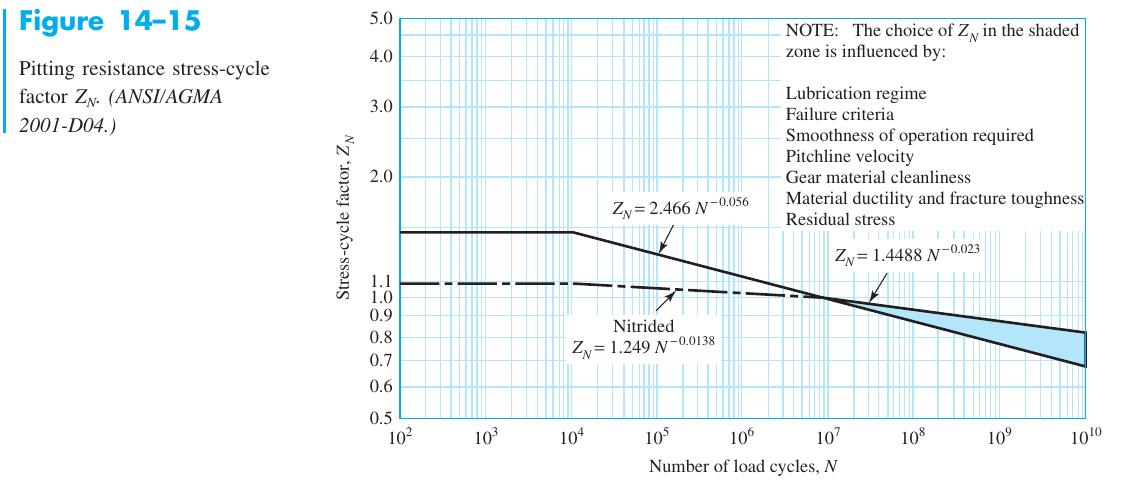

In [1319]:
Image('figure14-15.png')

In [1320]:
# Fator de vida
ZN = 1.4488*L4**-0.023
display(Math(f'Z_N = {ZN:.3f}'))

<IPython.core.display.Math object>

In [1321]:
# Fator de confiabilidade, temperatura e razão de dureza
KR = KT = CH = 1

In [1322]:
# Considerou-se fator de projeto de 1.2
SH = 1.2
SC = SH*σc / ZN
display(Math(f'S_c = {int(SC)} psi'))

<IPython.core.display.Math object>

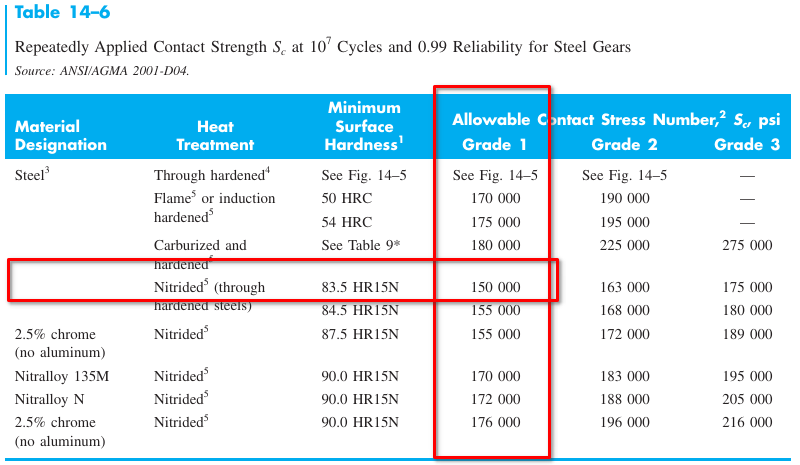

In [1323]:
Image('table14-6.png')

In [1324]:
SC = 150000
list_nc_desgaste = [0,1,2,3]

In [1325]:
# Fator de Segurança recalculado
nc = (SC*ZN) / σc
display(Math(f'n_c = {nc}'))
list_nc_desgaste[2] = nc

<IPython.core.display.Math object>

## Flexão engrenagem 4

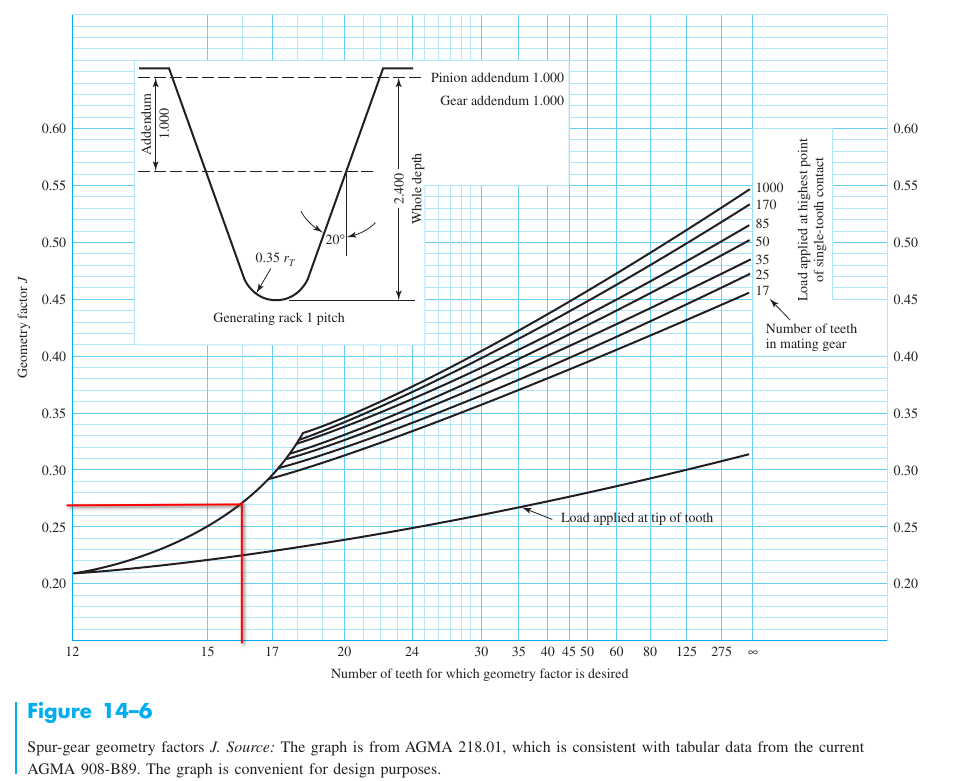

In [1326]:
Image('figure14-6.png')
# Fator de geometria J

In [1327]:
J = 0.27

In [1328]:
σ = W45*Kv*(P/F)*((Km)/J)
display(Math(f'\sigma = {σ:.0f} psi'))

<IPython.core.display.Math object>

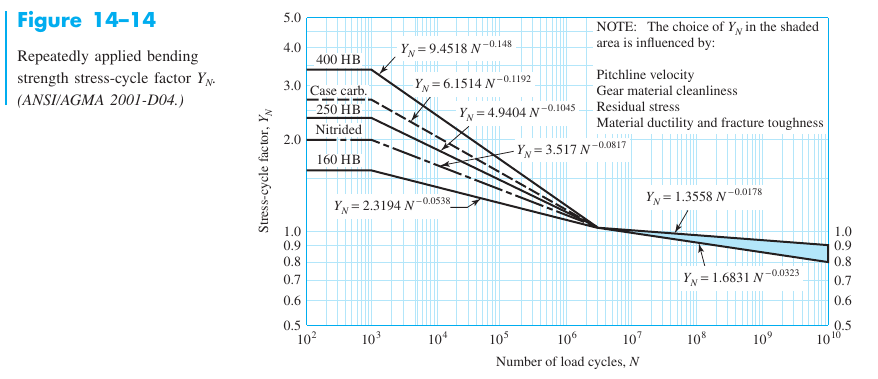

In [1329]:
Image('figure14-14.png')

In [1330]:
YN = 1.6831*L4**-0.0323
display(Math(f'Y_N = {YN:.3f}'))

<IPython.core.display.Math object>

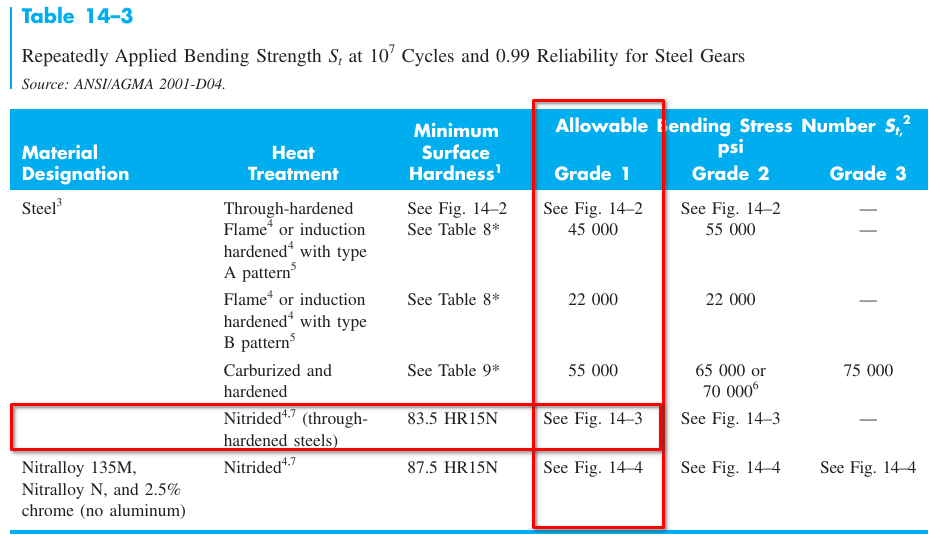

In [1331]:
Image('table14-3.png')

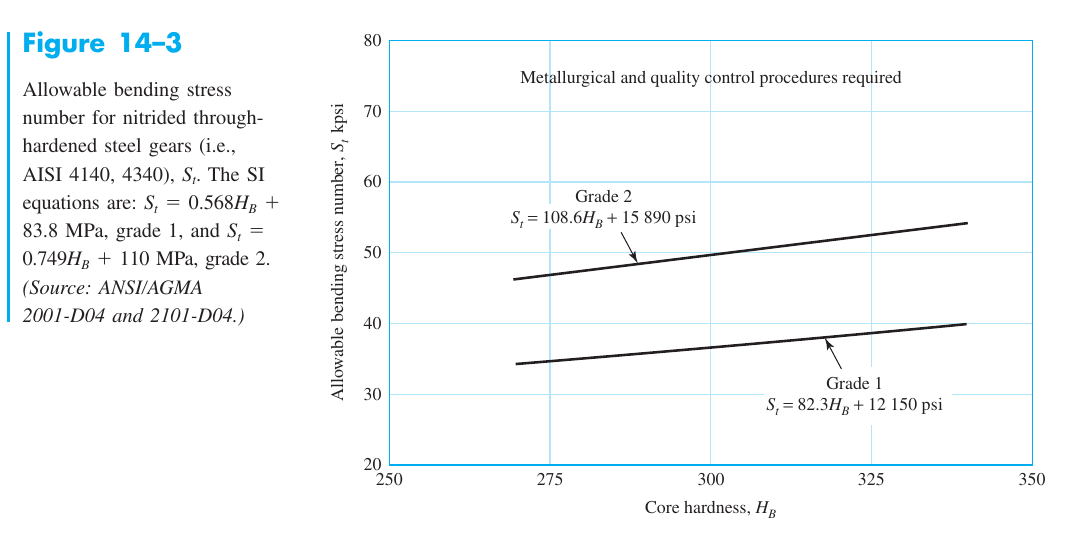

In [1332]:
Image('figure14-3.png')

In [1333]:
St = 82.3*325 + 12150
σ_all = St*YN
display(Math('\\sigma_{all} = %s psi'%(σ_all)))

<IPython.core.display.Math object>

In [1334]:
# Fator de segurança para flexão da engrenagem 4
list_n_flexão = [0,1,2,3]
n = σ_all / σ
list_n_flexão[2] = n
display(Math(f'n = {n}'))

<IPython.core.display.Math object>

## Flexão e Desgaste da Engrenagem 5
### Quase tudo é o mesmo que a Engrenagem 4, exceto $J, Y_N, Z_N$

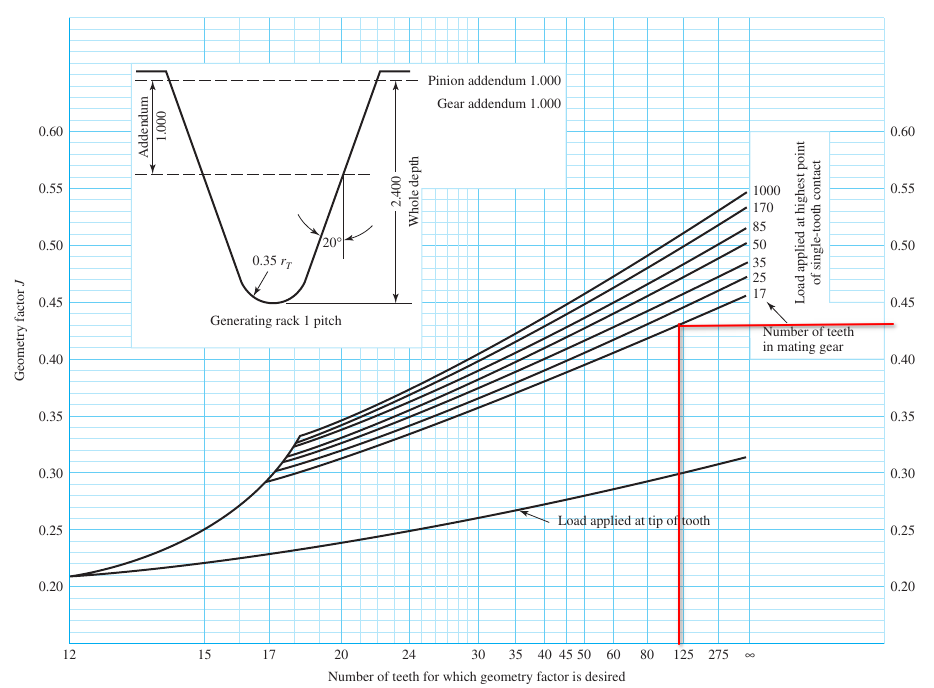

In [1335]:
Image('14-6-2.png')

In [1336]:
J = 0.43
L5 = 12000*60*ω5
display(Math(f'L_5 = {(L5*10**-7):.3f} *10⁷ rev'))

<IPython.core.display.Math object>

In [1337]:
YN = 1.6831*L5**-0.0323
display(Math(f'Y_N = {YN:.3f}'))

<IPython.core.display.Math object>

In [1338]:
ZN = 1.4488*L5**-0.023
display(Math(f'Z_N = {ZN:.3f}'))

<IPython.core.display.Math object>

In [1339]:
# Tensão de contato
σc = Cp*sy.sqrt(W45*Ko*Kv*Ks*(Km/(dp*F))*(Cf/I))
display(Math(f'\sigma_c = {int(σc)} psi'))

<IPython.core.display.Math object>

In [1340]:
σ = W45*Kv*(P/F)*((Km)/J)
display(Math(f'\sigma = {σ:.0f} psi'))

<IPython.core.display.Math object>

In [1341]:
nc = (SC*ZN) / σc
list_nc_desgaste[3] = nc
display(Math(f'n_c = {nc}'))

<IPython.core.display.Math object>

In [1342]:
σ_all = St*YN
display(Math('\\sigma_{all} = %s psi'%(σ_all)))

<IPython.core.display.Math object>

In [1343]:
n = σ_all / σ
list_n_flexão[3] = n
display(Math(f'n = {n}'))

<IPython.core.display.Math object>

## Desgaste Engrenagem 2

In [1344]:
# Kv - Fator Dinamico

Qv = 7

B = 0.25*(12 - Qv)**(2/3)
A = 50+56*(1-B)

Kv = ((A + sy.sqrt(V23)) / A)**B
display(Math(f'K_v = {Kv}'))

<IPython.core.display.Math object>

In [1345]:
# Reduziu-se para F = 1.5in já que essa engrenagem é menos requisitada
F = 1.5        #TODO: Conferir caso haja alteração
display(Math(f'F = {sy.latex(F)} in'))

<IPython.core.display.Math object>

In [1346]:
# Fator de distribuição de carga Km

Cpf = ((F)/(10*(dp))) - 0.0375 + 0.0125*(F)
display(Math('C_{pf} = %s'%Cpf))

Cmc = 1
Cpm = 1
Cma = 0.127 + 0.0158*(F) + (-0.930*10**-4)*(F)**2
display(Math('C_{ma} = %s'%Cma))
Ce = 1

Km = 1 + Cmc*(Cpf*Cpm + Cma*Ce)
display(Math('K_m = %s'%Km))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1347]:
σc = Cp*sy.sqrt(W23*Ko*Kv*Ks*(Km/(dp*F))*(Cf/I))
display(Math(f'\sigma_c = {int(σc)} psi'))

<IPython.core.display.Math object>

In [1348]:
L2 = 12000*60*ω2
display(Math(f'L_2 = {(L2*10**-9):.3f} *10⁹ rev'))

<IPython.core.display.Math object>

In [1349]:
ZN = 1.4488*L2**-0.023
display(Math(f'Z_N = {ZN:.3f}'))

<IPython.core.display.Math object>

In [1350]:
SC = SH*σc / ZN
display(Math(f'S_c = {int(SC)} psi'))

<IPython.core.display.Math object>

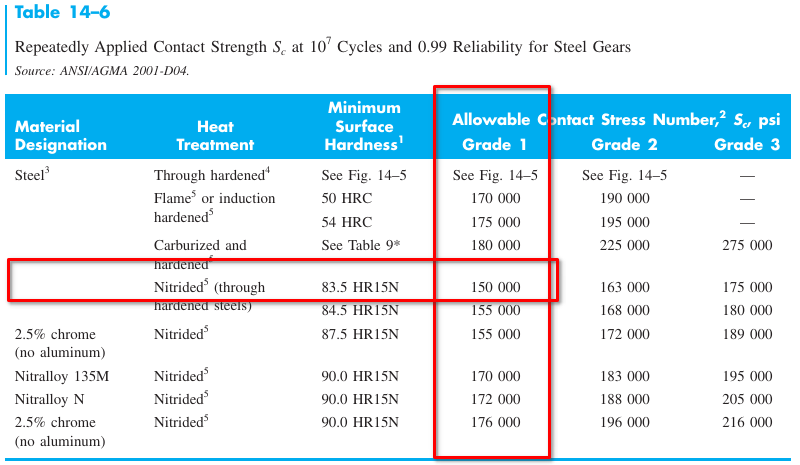

In [1351]:
Image('table14-6.png')

In [1352]:
SC = 150000

In [1353]:
nc = (SC*ZN) / σc
list_nc_desgaste[0] = nc
display(Math(f'n_c = {nc}'))

<IPython.core.display.Math object>

## Flexão Engrenagem 2

In [1354]:
J = 0.27 # Assim como engrenagem 5
YN = 1.6831*L2**-0.0323
display(Math(f'Y_N = {YN:.3f}'))

<IPython.core.display.Math object>

In [1355]:
σ = W23*Kv*(P/F)*((Km)/J)
display(Math(f'\sigma = {σ:.0f} psi'))

<IPython.core.display.Math object>

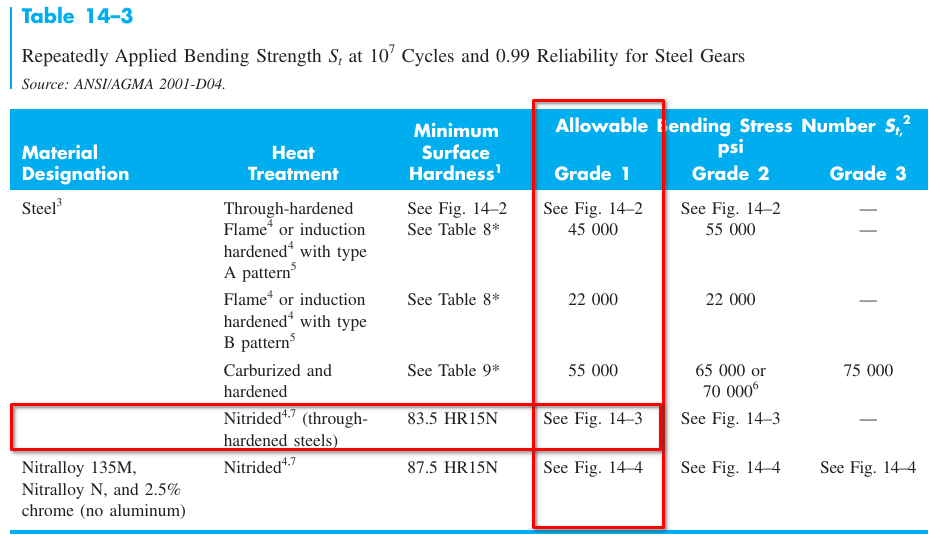

In [1356]:
Image('table14-3.png')

In [1357]:
σ_all = St*YN
display(Math('\\sigma_{all} = %s psi'%(σ_all)))

<IPython.core.display.Math object>

In [1358]:
n = σ_all / σ
list_n_flexão[0] = n
display(Math(f'n = {n:.3f}'))

<IPython.core.display.Math object>

## Desgaste e Flexão Engrenagem 3

In [1359]:
# Fator de distribuição de carga Km

Cpf = ((F)/(10*(dp))) - 0.0375 + 0.0125*(F)
display(Math('C_{pf} = %s'%Cpf))

Cmc = 1
Cpm = 1
Cma = 0.127 + 0.0158*(F) + (-0.930*10**-4)*(F)**2
display(Math('C_{ma} = %s'%Cma))
Ce = 1

Km = 1 + Cmc*(Cpf*Cpm + Cma*Ce)
display(Math('K_m = %s'%Km))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1360]:
J = 0.43
L3 = 12000*60*ω3
display(Math(f'L_3 = {(L3*10**-8):.3f} *10⁸ rev'))

YN = 1.6831*L3**-0.0323
display(Math(f'Y_N = {YN:.3f}'))

ZN = 1.4488*L3**-0.023
display(Math(f'Z_N = {ZN:.3f}'))

σc = Cp*sy.sqrt(W23*Ko*Kv*Ks*(Km/(dp*F))*(Cf/I))
display(Math(f'\sigma_c = {int(σc)} psi'))

σ = W23*Kv*(P/F)*((Km)/J)
display(Math(f'\sigma = {σ:.0f} psi'))

SC = SH*σc / ZN
display(Math(f'S_c = {int(SC)} psi'))

σ_all = St*YN
display(Math('\\sigma_{all} = %s psi'%(σ_all)))

nc = (SC*ZN) / σc
list_nc_desgaste[1] = nc
display(Math(f'n_c = {nc}'))

n = σ_all / σ
list_n_flexão[1] = n
display(Math(f'n = {n:.3f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Resumo: 

In [1361]:
data_dict["Nc (Desgaste)"] = list_nc_desgaste
data_dict["N (Flexão)"] = list_n_flexão
data_dict["F (in)"] = [1.5, 1.5, 2, 2]
data_dict["P (teeth/in)"] = [5,5,5,5]
df = pd.DataFrame(data_dict, index=list_gear_index).astype(float).round(2)
df

,N° of Teeth,ω (RPM),Torque (lbf.ft),d (in),Nc (Desgaste),N (Flexão),F (in),P (teeth/in)
Gear 2,16.0,1800.00,20.42,3.2,3.02,10.59,1.5,5.0
Gear 3,124.0,232.26,158.29,24.8,1.20,18.02,1.5,5.0
Gear 4,16.0,232.26,158.29,3.2,1.43,2.32,2.0,5.0
Gear 5,124.0,29.97,1226.77,24.8,1.50,3.95,2.0,5.0
